# Основні теми статистики:

## 3. Міри центральної тенденції

Мода - це найбільш часто зустрічаючесь значення ознаки яку вимірюємо

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 10)

In [3]:
import numpy as np

In [4]:
# Генеруємо дані
data = np.random.normal(165, 10, size=500).astype('int')

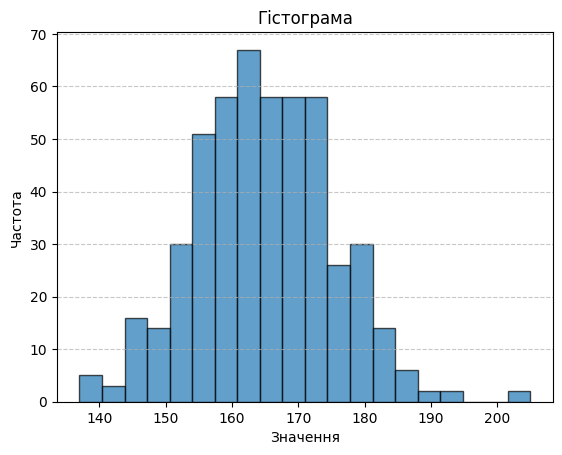

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def hist_plot(data, n_bins):
    # Створюємо гістограму
    plt.hist(data, bins=20, edgecolor='black', alpha=0.7)

    # Налаштовуємо вигляд графіку
    plt.title('Гістограма')
    plt.xlabel('Значення')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Відображаємо графік
    return plt.show()
hist_plot(data,20)

In [6]:
from scipy import stats as st
import numpy as np

st.mode(data, axis=0, nan_policy='propagate', keepdims=None)

/var/folders/dn/f65zy3pj4y9fm0d3kplg7n3r0000gn/T/ipykernel_33231/995204531.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(data, axis=0, nan_policy='propagate', keepdims=None)


ModeResult(mode=array([165]), count=array([24]))

Медіана - ділить впорядкований список даних на половину

In [7]:
np.median(data, axis=None, out=None, overwrite_input=False, keepdims=False)

165.0

Середнє значення - це сума всіх значень в вибірці і поділити на їх кількість. Середнє значення вибірки позначається x̄ , а генеральної совокупності - &mu;


In [8]:
np.mean(data, axis=None, dtype=None, out=None)

164.768

Для чого 3 міри центральної тенденції ? якщо всі 3 значення дуже близькі?

Коли наш розподіли симитричний, має одну моду і немає викидів, можна використовувати любу з трьох мір центральної тенденції. Бо всі три міри дадуть приблизно один і той ж самий результат

Але коли ми бачимо що в розподілі спостерігається асиметрія, тобто він скошений або вправо або в ліво або помітні викиди, або декілька мод, то використання середнього значення може дати нам некоректні результати, і краще використовувати моду або медіану.

### Властивості середнього значення

1. Якщо до кожного значення вибірки додати одне і теж число, то середнє значення теж збільшиться на це ж число M<sub>x+c</sub>=M<sub>x</sub> + с

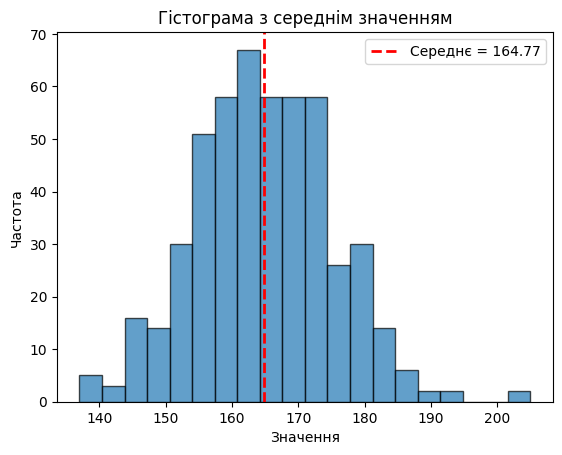

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Створюємо гістограму
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)

# Додаємо вертикальну лінію для середнього значення
mean_value = np.mean(data)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Середнє = {mean_value:.2f}')

# Налаштовуємо вигляд графіку
plt.title('Гістограма з середнім значенням')
plt.xlabel('Значення')
plt.ylabel('Частота')
plt.legend()  # Додаємо легенду

# Відображаємо графік
plt.show()

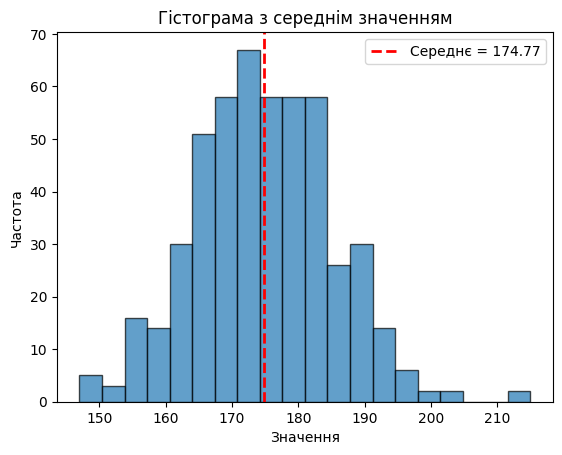

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data_plus_10 = data + 10

# Створюємо гістограму
plt.hist(data_plus_10, bins=20, edgecolor='black', alpha=0.7)

# Додаємо вертикальну лінію для середнього значення
mean_value = np.mean(data_plus_10)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Середнє = {mean_value:.2f}')

# Налаштовуємо вигляд графіку
plt.title('Гістограма з середнім значенням')
plt.xlabel('Значення')
plt.ylabel('Частота')
plt.legend()  # Додаємо легенду

# Відображаємо графік
plt.show()

2. Якщо кожне значення вибірки помножити одне і теж число, то середнє значення теж збільшиться у стільки ж разів M<sub>x*c</sub>=M<sub>x</sub> * с

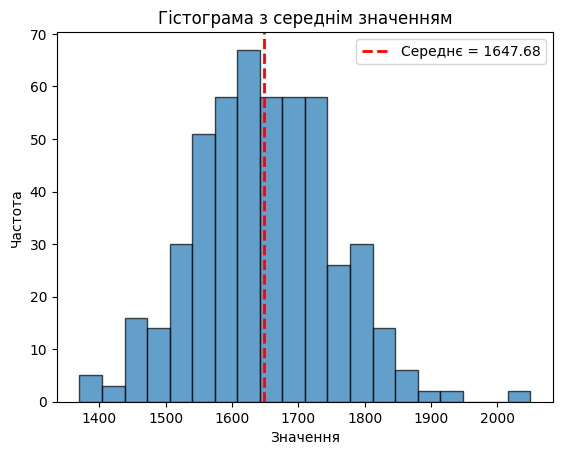

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data_multiply_10 = data * 10

# Створюємо гістограму
plt.hist(data_multiply_10, bins=20, edgecolor='black', alpha=0.7)

# Додаємо вертикальну лінію для середнього значення
mean_value = np.mean(data_multiply_10)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Середнє = {mean_value:.2f}')

# Налаштовуємо вигляд графіку
plt.title('Гістограма з середнім значенням')
plt.xlabel('Значення')
plt.ylabel('Частота')
plt.legend()  # Додаємо легенду

# Відображаємо графік
plt.show()

3. якщо від середнього значення відняти кожне значення нашої вибірки і просумувати то отримаємо 0

In [12]:
mean_ = np.mean(data)
lst = []
for number in data:
    
    lst.append(mean_ - number)
sum(lst)

3.410605131648481e-13

## 4. Міри мінливості

1. Розмах - різниця між максимальним і мінімальним значенням в вибірці. Недоліки: зміна одного з крайніх значень, буде дуже сильно змінювати значення розмаху

In [20]:
np.ptp(data, axis=None, out=None)

68

2. Дисперсія показує наскільки в середньому всі наші значення в вибірці відрізняються від середнього значення в вибірці. D= Середньому квадрату відхилень відхилень від середнього.

Квадрат потрібен для того щоб сума всіх відхилень від середнього != 0.

In [21]:
np.var(data, axis=None, dtype=None, out=None, ddof=0)

106.44217599999999

In [22]:
def calculate_variance(data):
    N = len(data)
    
    # Розрахунок середнього значення
    mean = sum(data) / N
    
    # Розрахунок суми квадратів відхилень від середнього
    sum_squared_diff = sum((x - mean) ** 2 for x in data)
    
    # Розрахунок дисперсії
    variance = sum_squared_diff / N
    
    return variance

# Приклад використання
result = calculate_variance(data)
print("Дисперсія:", result)

Дисперсія: 106.4421760000007


3. Корінь з дисперсії це середнє квадратичне відхилення. Воно показує реальне відхилення в вибірці, навідміну від дисперсії

In [30]:
np.sqrt(106.4421760000007)

10.317081757939146

In [31]:
np.std(data, axis=None, dtype=None, out=None, ddof=0)

10.317081757939112

&sigma; - середнє квадратичне відхилення для ГС, а sd - для вибірки.
І Значення sd показує що в середньому кожен елемент нашої вибірки відхиляється на це число від середнього

In [32]:
std_population = np.std(data, ddof=0)
print("Стандартне відхилення для ГС:", std_population)

Стандартне відхилення для ГС: 10.317081757939112


In [33]:
std_sample = np.std(data, ddof=1)
print("Вибіркове стандартне відхилення:", std_sample)

Вибіркове стандартне відхилення: 10.327414341157612
